<a href="https://colab.research.google.com/github/Philocreation/Practice_Preprocessing/blob/main/flawed_iris_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! wget https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/library/flawed_iris.csv

--2021-11-29 08:14:43--  https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/library/flawed_iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2782 (2.7K) [text/plain]
Saving to: ‘flawed_iris.csv.1’

flawed_iris.csv.1   100%[===================>]   2.72K  --.-KB/s    in 0s      

2021-11-29 08:14:43 (40.8 MB/s) - ‘flawed_iris.csv.1’ saved [2782/2782]



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("flawed_iris.csv")
print(df)

     septal_length septal_width  petal_length  petal_width   color  class
0              6.4          2.8           5.6          2.2   light    2.0
1              5.0          2.3           3.3          1.0  medium    1.0
2              4.9          2.5           4.5          1.7  medium    2.0
3              4.9          3.1           1.5          0.1    dark    0.0
4              5.7          3.8           1.7          0.3    dark    0.0
..             ...          ...           ...          ...     ...    ...
115            5.5          2.6           4.4          1.2   light    1.0
116            5.7            3           NaN          1.2   light    1.0
117            4.4          2.9           1.4          0.2   light    0.0
118            4.8            3           1.4          0.1    dark    0.0
119            5.5          2.4           3.7         -1.0    dark    1.0

[120 rows x 6 columns]


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   septal_length  117 non-null    float64
 1   septal_width   118 non-null    object 
 2   petal_length   117 non-null    float64
 3   petal_width    118 non-null    float64
 4   color          117 non-null    object 
 5   class          119 non-null    float64
dtypes: float64(4), object(2)
memory usage: 5.8+ KB
None


In [5]:
df.septal_width = df.septal_width.astype(float)

ValueError: ignored

In [6]:
print(df[df.septal_width=="2..3"])

    septal_length septal_width  petal_length  petal_width color  class
79            6.4         2..3           1.9          2.0   NaN    NaN


In [7]:
df.loc[df.septal_width=="2..3", "septal_width"] = "2.3"

In [8]:
df.septal_width = df.septal_width.astype(float)

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   septal_length  117 non-null    float64
 1   septal_width   118 non-null    float64
 2   petal_length   117 non-null    float64
 3   petal_width    118 non-null    float64
 4   color          117 non-null    object 
 5   class          119 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.8+ KB
None


In [10]:
df.color.value_counts()

dark      46
medium    38
light     33
Name: color, dtype: int64

In [11]:
df.color = df.color.astype('category')

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   septal_length  117 non-null    float64 
 1   septal_width   118 non-null    float64 
 2   petal_length   117 non-null    float64 
 3   petal_width    118 non-null    float64 
 4   color          117 non-null    category
 5   class          119 non-null    float64 
dtypes: category(1), float64(5)
memory usage: 5.0 KB
None


In [13]:
df.color_code = df.color.cat.codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [14]:
print(df.color_code)

0      1
1      2
2      2
3      0
4      0
      ..
115    1
116    1
117    1
118    0
119    0
Length: 120, dtype: int8


# 이상치 처리

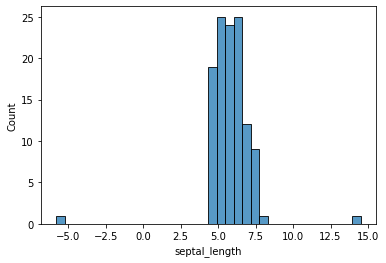

In [15]:
sns.histplot(df.septal_length)

In [16]:
print(df.loc[df.septal_length<2.5, "septal_length"])
print(df.loc[df.septal_length>10.0, "septal_length"])

41   -5.8
Name: septal_length, dtype: float64
90    14.5
Name: septal_length, dtype: float64


In [17]:
filtered = df.loc[(df.septal_length>=2.5) & (df.septal_length<=10.0),"septal_length"]
min = filtered.min()
max = filtered.max()

print("min = ", min)
print("max = ", max)

min =  4.4
max =  7.9


In [18]:
df.loc[df.septal_length <2.5, "septal_length"] = min
df.loc[df.septal_length >10.0, "septal_length"] = max

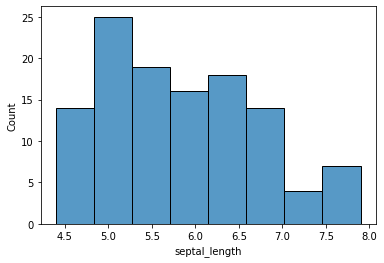

In [19]:
sns.histplot(df.septal_length)

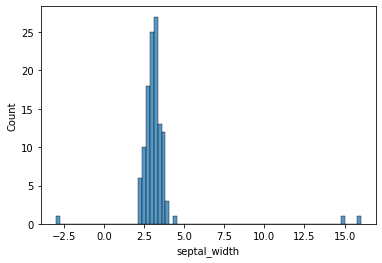

In [20]:
sns.histplot(df.septal_width)

In [21]:
print(df.loc[df.septal_width <0.0, "septal_width"])
print(df.loc[df.septal_width >5.0, "septal_width"])

55   -3.0
Name: septal_width, dtype: float64
59    16.0
74    15.0
Name: septal_width, dtype: float64


In [22]:
change = df.loc[(df.septal_width >0.0) & (df.septal_width<5.0), "septal_width"]
min = change.min()
max = change.max() 

print("min = ", min)
print("max = ", max)

min =  2.2
max =  4.4


In [23]:
df.loc[df.septal_width <0.0, "septal_width"] = min
df.loc[df.septal_width >10.0, "septal_width"] = max 

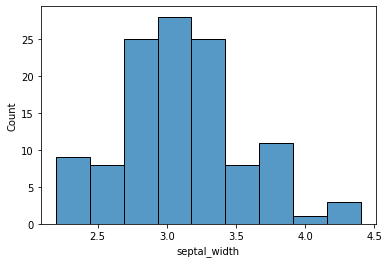

In [24]:
sns.histplot(df.septal_width)

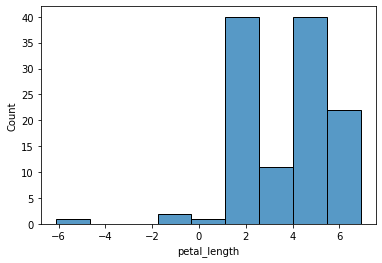

In [26]:
sns.histplot(df.petal_length)

In [29]:
print(df.loc[df.petal_length>-2, "petal_length"].mean())
a = df.loc[df.petal_length>-2, "petal_length"].mean()
b = round(a,1)
print(b)

3.6060344827586213
3.6


In [33]:
df.loc[df.petal_length<0, 'petal_length'] = b

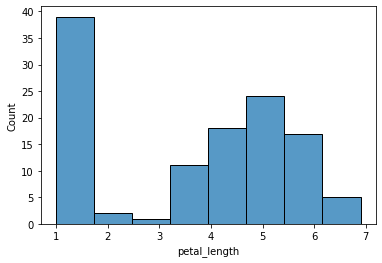

In [34]:
sns.histplot(df.petal_length)